<a href="https://colab.research.google.com/github/js-iMore/Tareas-Modelado-y-Simulaci-n/blob/master/trapezoidal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integración Númerica: Regla del Trapecio 

La regla del trapecio es un método de integración para calcular de forma aproximada el valor de una **integral definida**

* Regla del trapecio simple 

$$\int_{a}^{b} f(t)\ dt \approx (b - a)\frac{f(a) + f(b)}{2}$$

* Regla del trapecio compuesta 

$$\int_{a}^{b} f(t)\ dt \approx \frac{(b - a)}{n} \left[\frac{f(a) + f(b)}{2} + \sum_{k=1}^{n-1} f\left(a + k \frac{b-a}{n}\right) \right]$$

In [0]:
import numpy as np 
import matplotlib.pyplot as plt

#funcion para plotear 
def plot_(f,a,b,n):
    muestras = n+1
    xi = np.linspace(a,b,muestras)
    fi = f(xi)
    xig = np.linspace(a,b,muestras*10)
    fig = f(xig)
    plt.plot(xig,fig)
    plt.fill_between(xi,0,fi, color='g')
    for i in range(0,muestras,1):
        plt.axvline(xi[i], color='w')
    plt.plot(xi,fi, 'o') # puntos muestra
    plt.xlabel('x')
    plt.ylabel('f(x)')

Definimos nuestra función de integración del trapecio compuesta 

In [0]:
def trapz_(f,a,b,n):
    h = (b-a)/n 
    suma = (f(a)+f(b))/2
    for k in range(1,n):
        suma = suma + f(a + k*h)
    return h*suma 

La función que se toma como ejemplor para integrar es 
$$f(t) = \sqrt{x}sin(x)$$
entre $a = 1$ y $b = 3$

In [0]:
fx = lambda x: np.sqrt(x)*np.sin(x)
a,b = 1,3 

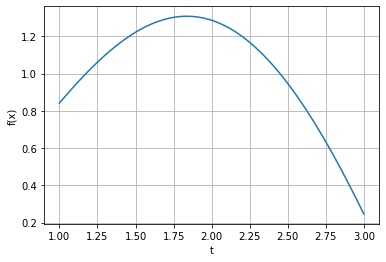

In [0]:
t = np.arange(a,b,0.001)
plt.plot(t,fx(t))
plt.xlabel('t')
plt.ylabel('f(x)')
plt.grid()

### Integración 

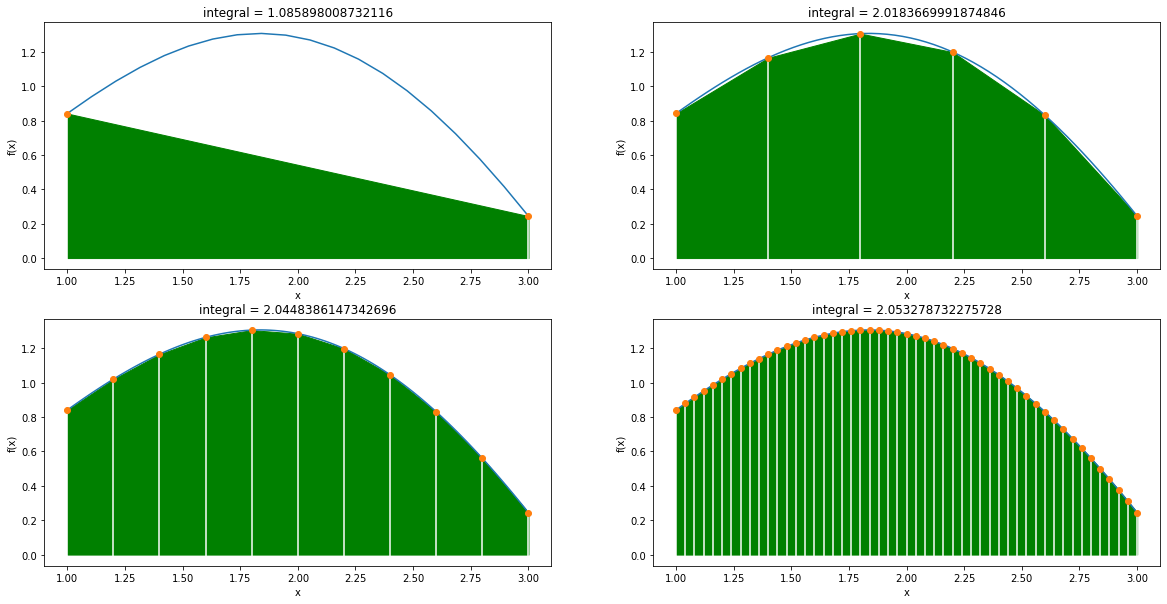

In [0]:
ns = [1,5,10,50]

plt.figure(figsize=(20,10))
for i,n in enumerate(ns):
    plt.subplot(2,2,i+1)
    inte = trapz_(fx,a,b,n)
    plot_(fx,a,b,n)
    plt.title("integral = {}".format(inte))

## Función trapz de Numpy  y Scipy
Las librerias Numpy y Scipy poseen la función trapz de integración. La libreria Scipy usa la función de Numpy, por ende son las mismas las dos funciones 

In [0]:
ns = np.arange(1,1000)
error = []
for n in ns:
    int_numpy = np.trapz(fx(np.arange(a,b+(b-a)/n,(b-a)/n)),dx =(b-a)/n)
    int_ = trapz_(fx,a,b,n)
    error.append(abs(int_numpy -int_))

Text(0.5, 0, 'ns')

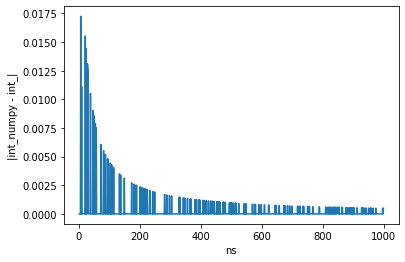

In [0]:
plt.plot(ns,error)
plt.ylabel('|int_numpy - int_|')
plt.xlabel('ns')

##Otro método: Regla de Simpson
Ademas de aplicar la regla trapezoidal con segmentos cada vez más finos, otra manera de obtener una estimación más exacta de una integral, es la de usar polinomios de orden superior para conectar los puntos.
A las formulas resultantes de calcular la integral bajo estos polinomios se les llama reglas de Simpson.

Para un intervalo [a,b]:

$$\int_{a}^{b} f(x)\ dx \approx \frac{(b - a)}{6} [(a) + 4f(m) f(b)]$$

Donde: $$ m = \frac{(a+b)}{2}$$

Con un error global:

$$E(f) = -\frac{h^5}{90}f^4(z) $$

Para z pertenciente al intervalo [a,b] y h:

$$\frac{(b-a)}{2}  $$



In [0]:
def Simpson(fx,a,b,subintervalos):
  h = (b-a)/subintervalos
  x = a
  area = 0
  for i in range(0,subintervalos,2):
      deltaA = (h/3)*(fx(x)+4*fx(x+h)+fx(x+2*h))
      area = area + deltaA
      x = x + 2*h
  return area

n = 8
Simpson(fx,a,b,n)


2.053709383061734

In [0]:
ns2 = np.arange(1,100)
errorsimp = []
for n in ns:
    int_numpy2 = np.trapz(fx(np.arange(a,b+(b-a)/n,(b-a)/n)),dx =(b-a)/n)
    simps = Simpson(fx,a,b,n)
    errorsimp.append(abs(int_numpy2 - simps))

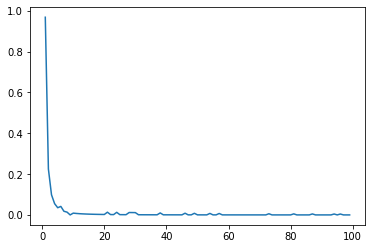

In [0]:
plt.plot(ns2,errorsimp)

### Referencias 
* Regla del trapecio. (2020). Retrieved 7 May 2020, from https://es.wikipedia.org/wiki/Regla_del_trapecio
* 5.1 Regla del trapecio – Análisis Numérico 1013. (2018). Retrieved 7 May 2020, from http://blog.espol.edu.ec/matg1013/5-1-regla-del-trapecio/

* 5.2 Regla de Simpson 1/3 – Análisis Numérico 1013. (2018). Retrieved 7 May 2020, from http://blog.espol.edu.ec/analisisnumerico/5-2-regla-de-simpson-1-3/
* Regla de Simpson. (2020). Retrieved 7 May 2020, from https://es.wikipedia.org/wiki/Regla_de_Simpson